In [217]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Step :1 read date column as date time datatype

In [218]:
df=pd.read_csv('dailysales.csv')

In [219]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    704 non-null    object 
 1   sales   704 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [220]:
df.head() 

,date,sales
0,01-Jan-18,477.0
1,02-Jan-18,365.0
2,03-Jan-18,442.0
3,04-Jan-18,490.0
4,05-Jan-18,396.0


# Step :2 No missing value

In [221]:
df.isnull().sum()

date     0
sales    0
dtype: int64

# Step-3 :Data Structure required for Time series

In [222]:
# df=df.groupby('date').sum()

In [223]:
df.head(10)

,date,sales
0,01-Jan-18,477.0
1,02-Jan-18,365.0
2,03-Jan-18,442.0
3,04-Jan-18,490.0
4,05-Jan-18,396.0
5,06-Jan-18,385.0
6,07-Jan-18,492.0
7,08-Jan-18,142.0
8,08-Jan-18,331.0
9,09-Jan-18,249.0


<Axes: >

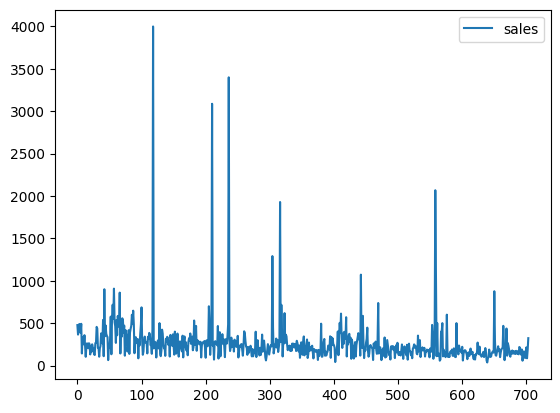

In [224]:
df.plot()

In [225]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [226]:
seasonal_decompose(df,model='additive',period=120).plot()

ValueError: could not convert string to float: '01-Jan-18'

# Step 4: Train test Split

In [227]:
train=df[:int(len(df)*0.8)] #till Jul19
test=df[int(len(df)*0.8):] # from aug19

In [228]:
train.tail()

,date,sales
558,31-Jul-19,2068.0
559,01-Aug-19,1000.0
560,02-Aug-19,110.0
561,03-Aug-19,500.0
562,04-Aug-19,112.0


In [229]:
test

,date,sales
563,05-Aug-19,134.0
564,06-Aug-19,140.0
565,07-Aug-19,57.0
566,08-Aug-19,71.0
567,09-Aug-19,400.0
...,...,...
699,27-Dec-19,133.0
700,28-Dec-19,214.1
701,29-Dec-19,85.5
702,30-Dec-19,182.9


In [230]:
test

,date,sales
563,05-Aug-19,134.0
564,06-Aug-19,140.0
565,07-Aug-19,57.0
566,08-Aug-19,71.0
567,09-Aug-19,400.0
...,...,...
699,27-Dec-19,133.0
700,28-Dec-19,214.1
701,29-Dec-19,85.5
702,30-Dec-19,182.9


# Step 5: Holt Winters Model

In [231]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [216]:
train

,sales
date,
01-Apr-18,145.00
01-Apr-19,116.80
01-Aug-19,1000.00
01-Dec-18,247.00
01-Dec-19,190.15
...,...
25-Apr-18,365.00
25-Apr-19,282.10
25-Aug-18,99.00


In [232]:
train['date']

0      01-Jan-18
1      02-Jan-18
2      03-Jan-18
3      04-Jan-18
4      05-Jan-18
         ...    
558    31-Jul-19
559    01-Aug-19
560    02-Aug-19
561    03-Aug-19
562    04-Aug-19
Name: date, Length: 563, dtype: object

In [233]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Assuming 'train' is the DataFrame with the time series data

# Convert to daily frequency
train['date'] = pd.to_datetime(train['date'])  # Convert to datetime if not already
train.set_index('Date', inplace=True)         # Set date as index
train = train.asfreq('D')                     # Ensure daily frequency
train['sales'] = train['sales'].fillna(method='ffill')  # Fill missing values if any

# Fit the Holt-Winters model for daily data
hwmodel = ExponentialSmoothing(
    train['sales'],
    trend='add',
    seasonal='mul',  # Or 'add' if you have non-positive values
    seasonal_periods=7  # Weekly seasonality for daily data
).fit()

# Forecast for the next 30 days
forecast = hwmodel.forecast(30)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.show()


C:\Users\umidu\AppData\Local\Temp\ipykernel_31752\289419209.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['date'] = pd.to_datetime(train['date'])  # Convert to datetime if not already
C:\Users\umidu\AppData\Local\Temp\ipykernel_31752\289419209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = pd.to_datetime(train['date'])  # Convert to datetime if not already


KeyError: "None of ['Date'] are in the columns"

In [167]:
test_pred=hwmodel.forecast(10)

c:\Users\umidu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\umidu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [168]:
test_pred

562    107.392337
563     96.405293
564    156.346738
565    127.722350
566    104.960575
567    117.763680
568     78.933702
569    377.133232
570     52.712514
571     60.702094
dtype: float64

<Axes: xlabel='date'>

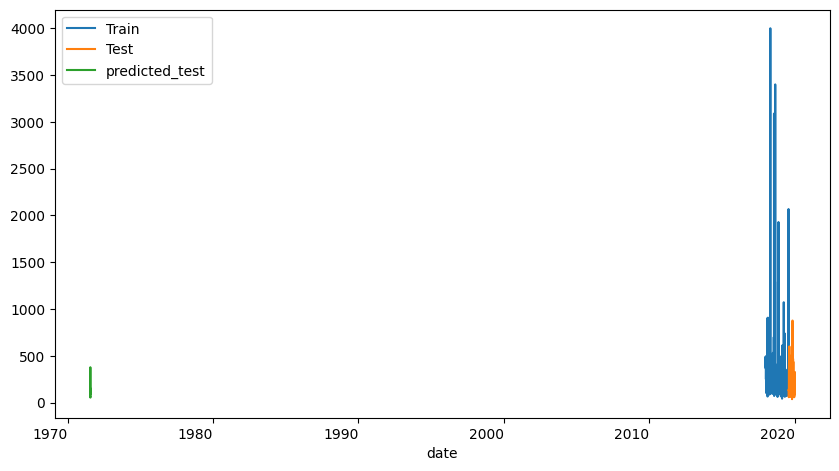

In [ ]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

# Step: 6. Model Evaluation

In [170]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test,test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [141, 10]

In [25]:
df.sales.mean(), np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

# Step: 7. Final Model

In [26]:
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [27]:
pred=final_model.forecast(4)

In [28]:
pred

2020-01-01    3521.047144
2020-02-01    3318.765257
2020-03-01    4984.848634
2020-04-01    4044.415441
Freq: MS, dtype: float64

<Axes: xlabel='date'>

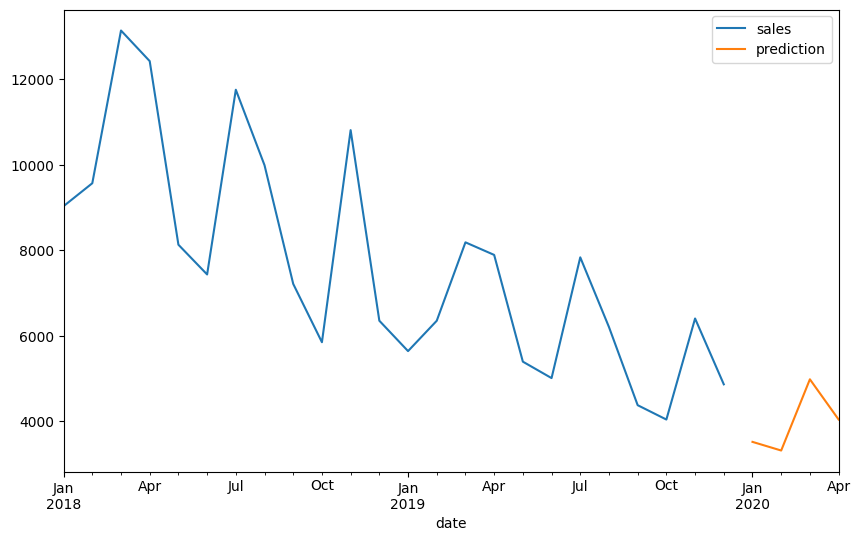

In [ ]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')